# Problem 1

In [ ]:
import torch; torch.manual_seed(0)
from PIL import Image
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions
from torchvision import datasets, models, transforms
import numpy as np
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [3, 3]

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
IMAGE_SIZE = 32*32*3

In [ ]:
def get_all_files_in_directory_recursive(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

directory = '../afhq/train/'
img_paths = get_all_files_in_directory_recursive(directory)



In [ ]:
# Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

map = {'cat':0,'dog':1,'wild':2}
X = []
Y = []
for img_path in img_paths:
    image = Image.open(img_path)
    
    # Convert the PIL image to a PyTorch tensor
    tensor_image = transform(image)
    tensor_image = tensor_image.permute(1,2,0)

    tensor_image = tensor_image.flatten()

    X.append(tensor_image)
    Y.append(map[img_path.split('/')[-2]])

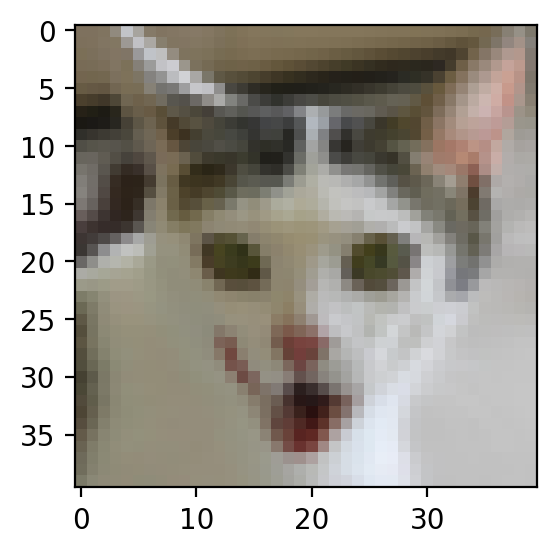

In [ ]:
img = X[100].reshape(32,32,3)
plt.imshow(img)

In [ ]:
X = torch.stack(X,dim = 0)
Y = torch.tensor(Y).unsqueeze(dim = 1)
print(X.shape)
print(Y.shape)

torch.Size([14630, 3072])
torch.Size([14630, 1])


### Number of Mixtures = 3

In [ ]:
from sklearn.mixture import GaussianMixture

model_1 = GaussianMixture(n_components=3, covariance_type='diag', init_params='random_from_data', verbose=1).fit(X)
model_1.means_

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True


array([[0.51108208, 0.50526488, 0.43629185, ..., 0.55309134, 0.52534794,
        0.46236123],
       [0.66023166, 0.65101348, 0.58146972, ..., 0.50764633, 0.47641621,
        0.41640508],
       [0.30314358, 0.29571029, 0.21901556, ..., 0.41454001, 0.38328615,
        0.31379782]])

In [ ]:
means = torch.tensor(model_1.means_)
cov = torch.tensor(model_1.covariances_)
means = check.view((M,3,32,32))

### Means of Guassian Mixtures

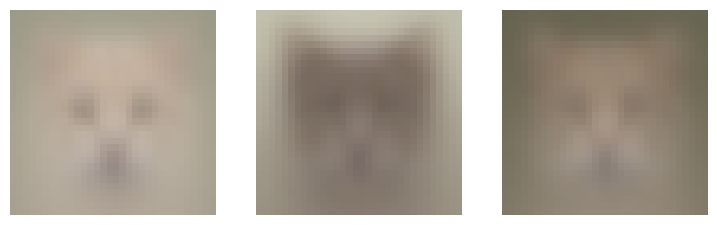

In [ ]:
plt.figure(figsize=(6,3))

for i in range(len(check)):
    plt.subplot(1,3,i+1)
    x=means[i].permute((1,2,0))
    plt.imshow(x)
    plt.axis(False)

In [ ]:
cov = model_1.covariances_
cov.shape

(3, 3072)

In [ ]:
weights = model_1.weights_

### Generating images 10*10

In [ ]:
N = torch.distributions.Normal(0, 0.01)
gen_images = []
N = torch.distributions.Normal(0, 1)
grid_size = 10*10
for i in range(grid_size):
    k = torch.multinomial(torch.tensor(weights), 1).item()
    z = means[k] + torch.from_numpy(cov[k].reshape(3,32,32))*N.sample((3,32,32)) 
    gen_images.append(z)

    

In [ ]:
gen_images = torch.stack(gen_images)
import torchvision
gen_grid = torchvision.utils.make_grid(gen_images, nrow=10, padding=2, normalize=True)

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Generated Images")
plt.imshow(gen_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./Generated/GMM/1.png', bbox_inches='tight')
plt.close()

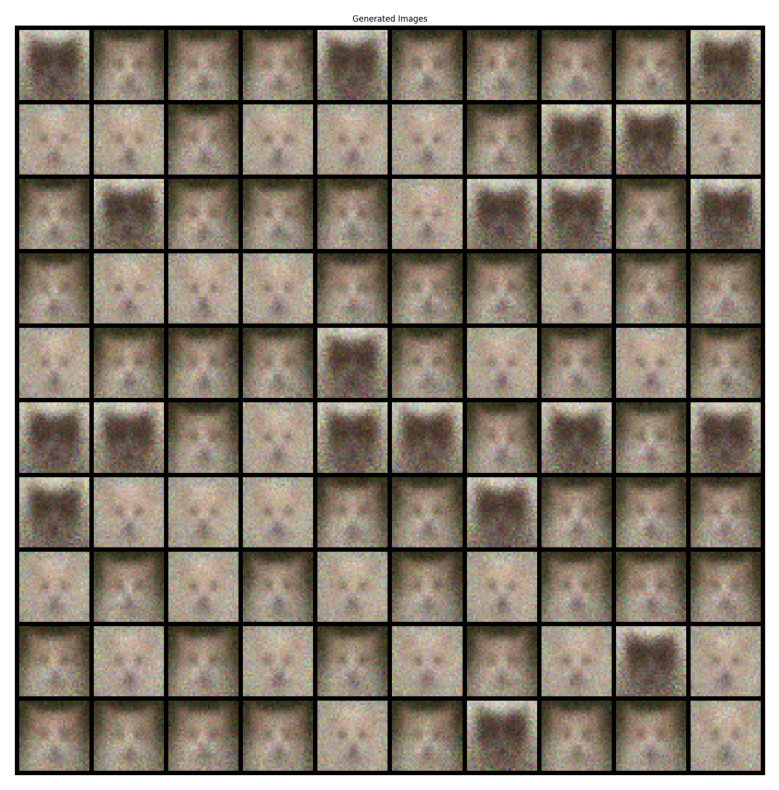

In [6]:
# Read the image
image_path = './Generated/GMM/1.png'
image = Image.open(image_path)

# Plot the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


### Number of Mixtures = 6

In [ ]:
model_2 = GaussianMixture(n_components=6, covariance_type='diag', init_params='random_from_data', random_state=SEED, verbose=1).fit(X)
model_2.means_

Initialization 0


  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True


array([[0.59265969, 0.5954886 , 0.59784022, ..., 0.5554919 , 0.54996843,
        0.54346922],
       [0.71989903, 0.72047064, 0.71673695, ..., 0.44110499, 0.44764642,
        0.4533975 ],
       [0.26715727, 0.26792358, 0.27241308, ..., 0.39240389, 0.37458561,
        0.35945506],
       [0.50721338, 0.50977844, 0.51367326, ..., 0.34610865, 0.34361828,
        0.34056591],
       [0.34945335, 0.34784911, 0.34799856, ..., 0.25328572, 0.25526323,
        0.25611083],
       [0.36906642, 0.3716269 , 0.37434344, ..., 0.42569691, 0.42039116,
        0.41617214]])

In [ ]:
means = torch.tensor(model_2.means_)
means = means.reshape((6,3,32,32))
means.shape

torch.Size([6, 3, 32, 32])

### Means of Guassian Mixtures

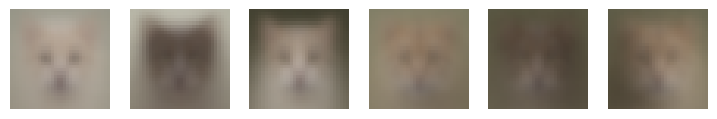

In [ ]:
plt.figure(figsize=(9,3))

for i in range(len(check)):
    plt.subplot(1,6,i+1)
    x=means[i].permute((1,2,0))
    plt.imshow(x)
    plt.axis(False)

In [ ]:
cov = model_2.covariances_

In [ ]:
weights = model_2.weights_

### Generating images 10*10

In [ ]:
N = torch.distributions.Normal(0, 1)
gen_images = []
N = torch.distributions.Normal(0, 1)
grid_size = 10*10
for i in range(grid_size):
    k = torch.multinomial(torch.tensor(weights), 1).item()
    z = means[k] + torch.from_numpy(cov[k].reshape(3,32,32))*N.sample((3,32,32)) 
    gen_images.append(z)

    

In [ ]:
gen_images = torch.stack(gen_images)
import torchvision
gen_grid = torchvision.utils.make_grid(gen_images, nrow=10, padding=2, normalize=True)

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Generated Images")
plt.imshow(gen_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./Generated/GMM/2.png', bbox_inches='tight')
plt.close()

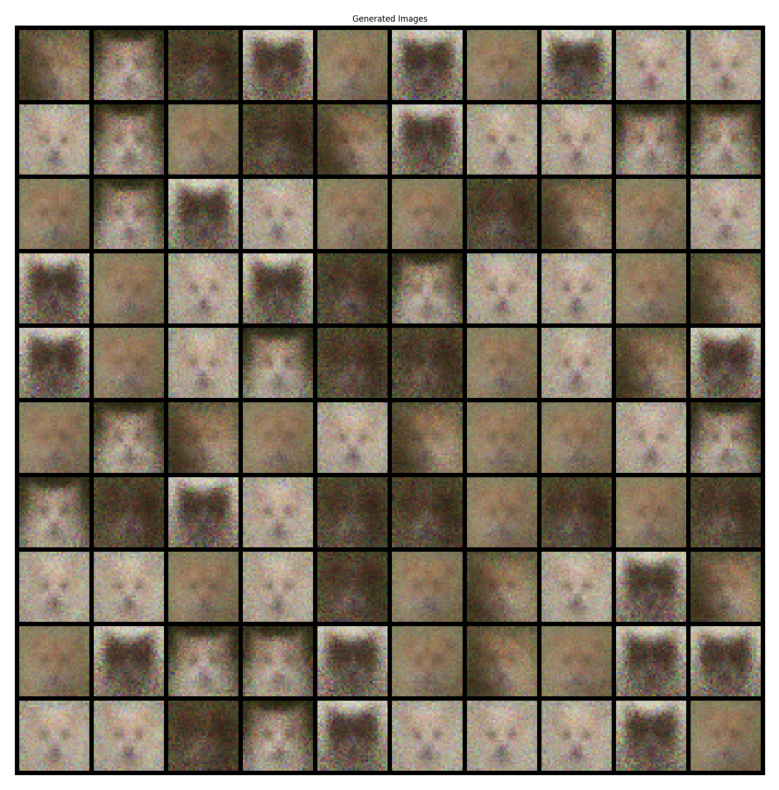

In [7]:
# Read the image
image_path = './Generated/GMM/2.png'
image = Image.open(image_path)

# Plot the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


### Number of Mixtures = 8

In [ ]:
model_3 = GaussianMixture(n_components=8, covariance_type='diag', init_params='random_from_data', random_state=SEED, verbose=1).fit(X)
model_3.means_

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
Initialization converged: True


array([[0.68990555, 0.69240083, 0.69452156, ..., 0.5748449 , 0.57515975,
        0.57416345],
       [0.45171838, 0.45157649, 0.44918536, ..., 0.55483657, 0.53385609,
        0.51532733],
       [0.5575745 , 0.55947545, 0.5624761 , ..., 0.24922925, 0.24893984,
        0.24979828],
       ...,
       [0.34123282, 0.34214259, 0.34489544, ..., 0.3636206 , 0.36063182,
        0.35752025],
       [0.27126211, 0.27446456, 0.27816751, ..., 0.40574062, 0.38964914,
        0.37708236],
       [0.70438366, 0.70303311, 0.70069867, ..., 0.42956281, 0.44177041,
        0.45142193]])

In [ ]:
means = torch.tensor(model_3.means_.)
means = means.reshape((8,3,32,32))
means.shape

torch.Size([8, 3, 32, 32])

### Means of Guassian Mixtures

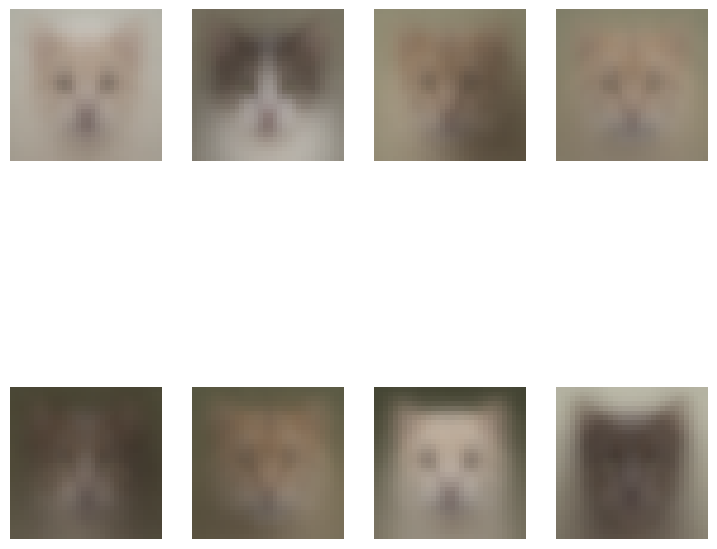

In [ ]:
plt.figure(figsize=(9,9))

for i in range(len(check)):
    plt.subplot(2,4,i+1)
    x=means[i].permute((1,2,0))
    plt.imshow(x)
    plt.axis(False)

In [ ]:
cov = model_3.covariances_

In [ ]:
weights = model_3.weights_

### Genearating images 10*10

In [ ]:
N = torch.distributions.Normal(0, 1)
gen_images = []
N = torch.distributions.Normal(0, 1)
grid_size = 10*10
for i in range(grid_size):
    k = torch.multinomial(torch.tensor(weights), 1).item()
    z = means[k] + torch.from_numpy(cov[k].reshape(3,32,32))*N.sample((3,32,32)) 
    gen_images.append(z)

    

In [ ]:
gen_images = torch.stack(gen_images)
import torchvision
gen_grid = torchvision.utils.make_grid(gen_images, nrow=10, padding=2, normalize=True)

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Generated Images")
plt.imshow(gen_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./Generated/GMM/3.png', bbox_inches='tight')
plt.close()

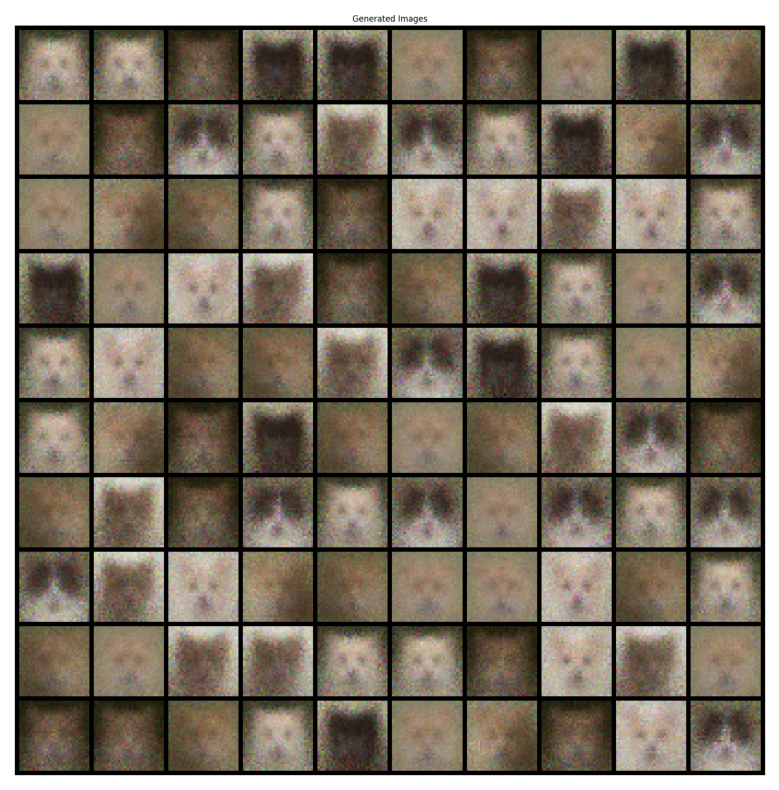

In [8]:
# Read the image
image_path = './Generated/GMM/3.png'
image = Image.open(image_path)

# Plot the image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


### NMI Calculations

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [ ]:
gp1 = model_1.predict(X)
gp2 = model_2.predict(X)
gp3 = model_3.predict(X)

gnmi12 = normalized_mutual_info_score(gp1, gp2)
gnmi13 = normalized_mutual_info_score(gp1, gp3)
gnmi23 = normalized_mutual_info_score(gp2, gp3)

In [ ]:
gnmi12, gnmi13, gnmi23

(0.36998923058140903, 0.3249852489294572, 0.44832828657390367)

# Problem 2 and Problem 3
-- Experiment with a single and multiple sample of z during training that goes at the input to the decoder <br>
-- Beta-VAE ( Generalized)


## Vanilla VAE with MSE loss

In [ ]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
from torch.distributions.multivariate_normal import MultivariateNormal
import os
plt.rcParams['figure.figsize'] = [3, 3]

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
LATENT_DIMS = 16
BATCH_SIZE = 256
IMAGE_SIZE = 128

### Data Preparation

In [ ]:

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ]),
}

# Create train,test and validation datasets
train_data = datasets.ImageFolder('../afhq/train/',data_transforms['train'])
val_data = datasets.ImageFolder('../afhq/val/',data_transforms['val'])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
class_names = train_data.classes

print("Train dataset size --- ",len(train_data))
print("Val dataset size --- ",len(val_data))
print("Class_names --- ",class_names)

Train dataset size ---  14630
Val dataset size ---  1500
Class_names ---  ['cat', 'dog', 'wild']


In [ ]:
train_iter = iter(train_loader)
X,Y = next(train_iter)
print(X.shape)
print(Y.shape)

torch.Size([256, 3, 128, 128])
torch.Size([256])


In [ ]:
print(X.max())
print(X.min())

tensor(1.)
tensor(0.)


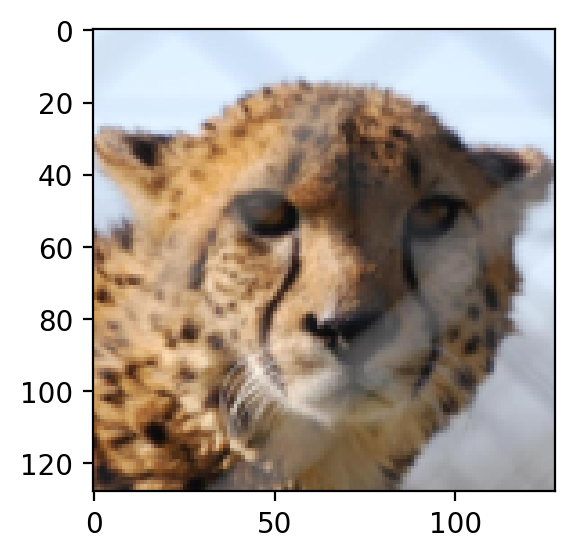

In [ ]:
# When pixel values are in range 0-1
plt.imshow(X[0].permute(1,2,0))

### Encoder-Decoder Architecture

In [ ]:
class ResDown(nn.Module):
    """
    Residual down sampling block for the encoder
    """

    def __init__(self, channel_in, channel_out, stride = 2,kernel_size=3):
        super(ResDown, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out // 2, kernel_size=kernel_size, stride=stride, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(channel_out // 2, eps=1e-4)
        self.conv2 = nn.Conv2d(in_channels=channel_out // 2, out_channels=channel_out, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(channel_out, eps=1e-4)

        self.conv3 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out, kernel_size=kernel_size, stride=stride, padding=kernel_size // 2)

        self.act_fnc = nn.ELU()

    def forward(self, x):
        skip = self.conv3(x)
        x = self.act_fnc(self.bn1(self.conv1(x)))
        x = self.conv2(x)
        return self.act_fnc(self.bn2(x + skip))
    

class ResUp(nn.Module):
    """
    Residual up sampling block for the decoder
    """

    def __init__(self, channel_in, channel_out, kernel_size=3, upsample = True,scale_factor=2):
        super(ResUp, self).__init__()

        self.upsample = upsample
        self.conv1 = nn.Conv2d(channel_in, out_channels=channel_in // 2, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm2d(channel_in // 2, eps=1e-4)
        self.conv2 = nn.Conv2d(channel_in // 2, channel_out, kernel_size, 1, kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(channel_out, eps=1e-4)

        self.conv3 = nn.Conv2d(channel_in, channel_out, kernel_size, 1, kernel_size // 2)

        #self.up_nn = nn.Upsample(scale_factor=scale_factor, mode="nearest")
        self.up_nn = nn.ConvTranspose2d(channel_in, channel_in, kernel_size=4, stride = 2, padding=1)

        self.act_fnc = nn.ELU()

    def forward(self, x):
        if self.upsample:
            x = self.up_nn(x)
        skip = self.conv3(x)
        x = self.act_fnc(self.bn1(self.conv1(x)))
        x = self.conv2(x)

        return self.act_fnc(self.bn2(x + skip))

In [ ]:
class VariationalEncoder(nn.Module):
    def __init__(self,in_channels = 3,latent_channels = 4):
        super(VariationalEncoder, self).__init__()
        self.block_out_channels = [64,128,256,512]
        self.conv_in = torch.nn.Conv2d(
            in_channels,
            self.block_out_channels[0],
            kernel_size=3,
            stride=1,
            padding=1,
        )

        self.conv1 = ResDown(channel_in=self.block_out_channels[0],channel_out=self.block_out_channels[0],stride=2)


        self.conv2 = ResDown(channel_in=self.block_out_channels[0],channel_out=self.block_out_channels[1],stride=2)

        self.conv3 = ResDown(channel_in=self.block_out_channels[1],channel_out=self.block_out_channels[2],stride=2)

        self.conv4 = ResDown(channel_in=self.block_out_channels[2],channel_out=self.block_out_channels[3],stride=2)

        self.mid = ResDown(channel_in=self.block_out_channels[3],channel_out=self.block_out_channels[3],stride=2)

        self.conv_norm_out = nn.GroupNorm(num_channels=self.block_out_channels[-1], num_groups=32, eps=1e-6)
        self.conv_act = nn.SiLU()

        conv_out_channels = 2 * latent_channels
        self.conv_out = nn.Conv2d(self.block_out_channels[-1], conv_out_channels, 3, padding=1)

        self.quant_conv = nn.Conv2d(2 * latent_channels, 2 * latent_channels, 1)

        

    def forward(self, x):
        # x = (b,3,128,128)

        out = x
        out = self.conv_in(out) # (b,64,128,128)
        out = self.conv1(out) # (b,64,64,64)
        out = self.conv2(out) # (b,128,32,32)
        out = self.conv3(out) # (b,256,16,16)
        out = self.conv4(out) # (b,512,8,8)
        out = self.mid(out) # (b,512,4,4)
        out = self.conv_norm_out(out)
        out = self.conv_act(out)
        out = self.conv_out(out) # (b,2,4,4)

        moment = self.quant_conv(out)
        mean, logvar = torch.chunk(moment, 2, dim=1)
        # mean, logvar = (b,1,4,4)


        return mean,logvar

In [ ]:
model = VariationalEncoder(latent_channels=2)
def model_memory_size_in_MB(model):
    return sum(p.numel() for p in model.parameters()) * 4 / (1024 ** 2)

print(f"Model size (in MB): {model_memory_size_in_MB(model)}")


Model size (in MB): 33.158905029296875


In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_channels = 4,out_channels = 3):
        super(Decoder, self).__init__()
        self.post_quant_conv = nn.Conv2d(latent_channels, latent_channels, 1)

        self.block_out_channels = [64,128,256,512]
        self.conv_in = nn.Conv2d(
            latent_channels,
            self.block_out_channels[-1],
            kernel_size=3,
            stride=1,
            padding=1,
        )
        

        #self.mid = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-1],upsample=False)

        self.deconv1 = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-1],upsample=True)

        self.deconv2 = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-2],upsample=True)

        self.deconv3 = ResUp(channel_in=self.block_out_channels[-2],channel_out=self.block_out_channels[-3],upsample=True)

        self.deconv4 = ResUp(channel_in=self.block_out_channels[-3],channel_out=self.block_out_channels[-4],upsample=True)

        self.deconv5 = ResUp(channel_in=self.block_out_channels[-4],channel_out=self.block_out_channels[-4],upsample=True)


        

        self.conv_norm_out = nn.GroupNorm(num_channels=self.block_out_channels[0], num_groups=8, eps=1e-6)
        self.conv_act = nn.SiLU()
        self.conv_out = nn.Conv2d(self.block_out_channels[0], out_channels, 3, padding=1)


    def forward(self, z):
        # z = (b,1,4,4)
        out = self.conv_in(z) # (b,512,4,4)


        out = self.deconv1(out) # (b,512,8,8)
        out = self.deconv2(out) # (b,256,16,16)
        out = self.deconv3(out) # (b,128,32,32)
        out = self.deconv4(out) # (b,64,64,64)
        out = self.deconv5(out) # (b,64,128,128)
        
        out = self.conv_norm_out(out)
        out = self.conv_act(out)
        out = self.conv_out(out) # (b,3,128,128)
        
        return out



In [ ]:
decoder = Decoder(latent_channels=2)
print(f"Model size (in MB): {model_memory_size_in_MB(decoder)}")

Model size (in MB): 70.37076187133789


In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_channels = 4, L = 1):
        super(VariationalAutoencoder, self).__init__()
        self.L = L
        self.latent_channels = latent_channels
        self.encoder = VariationalEncoder(latent_channels=latent_channels)
        self.decoder = Decoder(latent_channels=latent_channels)

        self.N = torch.distributions.Normal(0, 1)
    
    def reparametrize(self,mu,log_var):
        sigma = torch.exp(0.5*log_var)
        z = mu + sigma*(self.N.sample(mu.shape).to(sigma.device))
        return z
    
    def forward(self, x):
        z_mu,z_log_var = self.encoder(x)
        self.KL = 0.5 * torch.sum(z_log_var.exp() + z_mu.pow(2) - z_log_var - 1.0,dim=[1, 2, 3]) / BATCH_SIZE

        self.recon_loss = 0.0
        for i in range(self.L):
            z = self.reparametrize(z_mu,z_log_var)
            x_hat = self.decoder(z)
            self.recon_loss+= -F.mse_loss(x_hat, x, reduction='sum') / BATCH_SIZE

        return x_hat,self.KL,self.recon_loss

### Training

In [ ]:
from tensorboardX import SummaryWriter
writer = SummaryWriter('./runs/latent_16_beta_7_L_5')

In [ ]:
autoencoder = VariationalAutoencoder(latent_channels=1,L=5).to(device) # GPU
# autoencoder.load_state_dict(torch.load('./trained_models/latent_32_checkpoint_30.pth'))
opt = torch.optim.Adam(autoencoder.parameters(), lr= 1e-4)

rec_loss = []
KL_loss = []
beta = 0.0


In [ ]:
autoencoder = torch.nn.DataParallel(autoencoder,device_ids = [0,2,3,4])
#autoencoder(X.to(device))[0].shape

In [ ]:
epochs = 30

for epoch in range(epochs):
    iter = 0
    total_loss = 0.0
    total_rec_loss = 0.0
    total_KL_loss = 0.0
    for x, y in train_loader:
        iter+=1
        x = x*2.0 - 1.0
        x = x.to(device) # GPU
        opt.zero_grad()
        x_hat,KL,recon_loss = autoencoder(x)
        KL = torch.sum(KL)
        recon_loss = torch.sum(recon_loss)

        ELBO = recon_loss - beta*KL
        # rec_loss.append(-autoencoder.recon_loss)
        # KL_loss.append(autoencoder.KL)
        loss = -ELBO
        total_loss +=loss
        total_rec_loss +=-recon_loss
        total_KL_loss +=KL
        loss.backward()
        
        opt.step()
        if iter%10 == 0:
            #print("Epoch == ",epoch,"Iter == ",iter,"  Loss == ",total_loss.item()/(iter))
            writer.add_scalar('Total_Loss/train', total_loss.item()/iter, epoch*len(train_loader)+iter)
            writer.add_scalar('Rec_Loss/train', total_rec_loss.item()/iter, epoch*len(train_loader)+iter)
            writer.add_scalar('KL_Loss/train', total_KL_loss.item()/iter, epoch*len(train_loader)+iter)
        if iter%50 == 0:
            print("Epoch == ",epoch,"Iter == ",iter,"  Loss == ",total_loss.item()/(iter))
    
    if epoch>0 and epoch%5 == 0:
        torch.save(autoencoder.module.state_dict(), os.path.join('./trained_models/latent_16_beta_7_L_5/checkpoint_{}.pth'.format(epoch)))
            
    rec_loss.append(total_rec_loss.item()/len(train_loader))
    KL_loss.append(total_KL_loss.item()/len(train_loader))
    print("\n\nEpoch == ",epoch,"  Loss == ",total_loss.item()/len(train_loader))

/data4/home/manikantab/Diffusion_models/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch ==  0 Iter ==  50   Loss ==  43949.665


Epoch ==  0   Loss ==  41646.14224137931
Epoch ==  1 Iter ==  50   Loss ==  27356.5475


Epoch ==  1   Loss ==  26796.407327586207
Epoch ==  2 Iter ==  50   Loss ==  25412.04


Epoch ==  2   Loss ==  24986.32974137931
Epoch ==  3 Iter ==  50   Loss ==  24718.0325


Epoch ==  3   Loss ==  24352.29525862069
Epoch ==  4 Iter ==  50   Loss ==  24275.4075


Epoch ==  4   Loss ==  23912.6875
Epoch ==  5 Iter ==  50   Loss ==  24049.93


Epoch ==  5   Loss ==  23681.396551724138
Epoch ==  6 Iter ==  50   Loss ==  23876.4325


Epoch ==  6   Loss ==  23487.310344827587
Epoch ==  7 Iter ==  50   Loss ==  23657.18


Epoch ==  7   Loss ==  23306.116379310344
Epoch ==  8 Iter ==  50   Loss ==  23565.03


Epoch ==  8   Loss ==  23210.756465517243
Epoch ==  9 Iter ==  50   Loss ==  23248.9475


Epoch ==  9   Loss ==  22916.512931034482
Epoch ==  10 Iter ==  50   Loss ==  23023.8


Epoch ==  10   Loss ==  22680.29525862069
Epoch ==  11 Iter ==  50   Loss 

### Loading the saved model

In [ ]:
model = VariationalAutoencoder(latent_channels=1).to('cuda:0')
model.load_state_dict(torch.load('./trained_models/latent_16_beta_7/checkpoint_20.pth'))
model.eval()

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1): ResDown(
      (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act_fnc): ELU(alpha=1.0)
    )
    (conv2): ResDown(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True

### Plotting grid of Original,Reconstructions


In [ ]:
model.eval()

original_images = []
returned_images = []
iter = 0
for x, y in train_loader:
    iter+=1
    x = x*2.0 - 1.0
    x = x.to('cuda:0') # GPU
    x_hat,_,_ = model(x)
    x_hat = (x_hat / 2 + 0.5).clamp(0, 1) 
    x = (x / 2 + 0.5).clamp(0, 1) 
    original_images.append(x.detach().cpu())
    returned_images.append(x_hat.detach().cpu())

    if len(original_images) * train_loader.batch_size >= 100:
            break

    

In [ ]:
# # Convert lists of tensor batches into single tensors
import torchvision
original_images = torch.cat(original_images, dim=0)[:100]  # Taking first 100 images
returned_images = torch.cat(returned_images, dim=0)[:100]

# Create 10x10 grids
original_grid = torchvision.utils.make_grid(original_images, nrow=10, padding=2, normalize=True).cpu()
returned_grid = torchvision.utils.make_grid(returned_images, nrow=10, padding=2, normalize=True).cpu()

In [ ]:
# Display the original images
plt.figure(figsize=(20,20))
plt.title("Original Images")
plt.imshow(original_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('original.png', bbox_inches='tight')
plt.close()

In [ ]:
# Display the returned images
plt.figure(figsize=(20,20))
plt.title("Returned Images")
plt.imshow(returned_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./reconstructed/latent_16_beta_7/epoch_20.png', bbox_inches='tight')
plt.close()

### Interpolations

In [ ]:

import torch
from PIL import Image
import imageio

N = torch.distributions.Normal(0, 1)
img1 = X[0].unsqueeze(0)*2.0 - 1.0
mu,log_var = model.encoder(img1.to('cuda:0'))
sigma = torch.exp(0.5*log_var).to('cuda:0')
latent1 = mu+sigma*N.sample(mu.shape).to('cuda:0')

img2 = X[1].unsqueeze(0)*2.0 - 1.0
mu,log_var = model.encoder(img2.to('cuda:0'))
sigma = torch.exp(0.5*log_var).to('cuda:0')
latent2 = mu+sigma*N.sample(mu.shape).to('cuda:0')

interpolated_images = []
num_interpolations = 100

# Compute the interpolations
for alpha in torch.linspace(0, 1, num_interpolations):
    interpolated_latnet = latent1 * (1 - alpha) + latent2 * alpha

    interpolated_image = model.decoder(interpolated_latnet.to('cuda:0'))
    interpolated_image = (interpolated_image / 2 + 0.5).clamp(0, 1)

    # Convert the tensor image to a PIL image
    pil_image = Image.fromarray((interpolated_image.squeeze().detach().cpu().permute(1, 2, 0).numpy() * 255).astype('uint8'))
    interpolated_images.append(pil_image)

imageio.mimsave('./interpolations/latent_16_beta_7/epoch_20.gif', interpolated_images, duration=0.5)

### Plotting grid of generations

In [ ]:
model.eval()
gen_images = []
N = torch.distributions.Normal(0, 1)
grid_size = 10*10
each_batch = 2
latent_shape = (each_batch,1,4,4)
for i in range(grid_size//each_batch):
    latent = N.sample(latent_shape)
    x_hat = model.decoder(latent.to('cuda:0'))
    x_hat = (x_hat / 2 + 0.5).clamp(0, 1) 
    gen_images.append(x_hat.detach().cpu())

    

In [ ]:
# # Convert lists of tensor batches into single tensors
import torchvision
gen_images = torch.cat(gen_images, dim=0)[:100]  # Taking first 100 images

# Create 10x10 grids
gen_grid = torchvision.utils.make_grid(gen_images, nrow=10, padding=2, normalize=True)

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Generated Images")
plt.imshow(gen_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./Generated/latent_16_beta_7/epoch_20.png', bbox_inches='tight')
plt.close()

### Generating latent for classification

In [ ]:
train_X = torch.zeros(len(train_data),LATENT_DIMS)
train_Y = torch.zeros(len(train_data))

val_X = torch.zeros(len(val_data),LATENT_DIMS)
val_Y = torch.zeros(len(val_data))

for ind,(x, y) in enumerate(train_loader):
    x = x*2.0 - 1.0
    x = x.to('cuda:0') 
    z_mu,z_log_var = model.encoder(x)
    z_mu = z_mu.view(z_mu.size(0),-1)
    train_X[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE,:LATENT_DIMS] = z_mu.detach()
    #train_X[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE,LATENT_DIMS:] = z_log_var.detach()

    train_Y[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE] = y
    if ind%100==0:
        print(ind)


0


In [ ]:

for ind,(x, y) in enumerate(val_loader):
    x = x*2.0 - 1.0
    x = x.to('cuda:0') 
    z_mu,z_log_var = model.encoder(x)
    z_mu = z_mu.view(z_mu.size(0),-1)
    #print(z_mu.shape,ind*BATCH_SIZE,min(len(val_data),(ind+1)*BATCH_SIZE))

    val_X[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE),:LATENT_DIMS] = z_mu.detach()
    #val_X[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE),LATENT_DIMS:] = z_log_var.detach()

    val_Y[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE)] = y
    if ind%100==0:
        print(ind)

0


In [ ]:
train_Y = train_Y.to(torch.int64)
val_Y = val_Y.to(torch.int64)
NUM_CLASSES = 3

In [ ]:
torch.save(train_X, './latent_dataset/latent_32/trainX_tensor.pt')
torch.save(train_Y, './latent_dataset/latent_32/trainY_tensor.pt')
torch.save(val_X, './latent_dataset/latent_32/valX_tensor.pt')
torch.save(val_Y, './latent_dataset/latent_32/valY_tensor.pt')


## CNN classifier

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
NUM_CLASSES = 3

### Preparing Datasets and Dataloaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(IMAGE_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.CenterCrop(IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create train,test and validation datasets
train_data = datasets.ImageFolder('../afhq/train/',data_transforms['train'])
val_data = datasets.ImageFolder('../afhq/val/',data_transforms['val'])

In [ ]:
image_datasets = {'train' : train_data, 'val' : val_data}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = train_data.classes



print("Train dataset size --- ",len(train_data))
print("Val dataset size --- ",len(val_data))
print("Class_names --- ",class_names)

Train dataset size ---  14630
Val dataset size ---  1500
Class_names ---  ['cat', 'dog', 'wild']


In [ ]:
train_iter = iter(dataloaders['train'])
X,Y = next(train_iter)
print(X.shape)
print(Y.shape)

torch.Size([32, 3, 128, 128])
torch.Size([32])


(128, 128, 3)


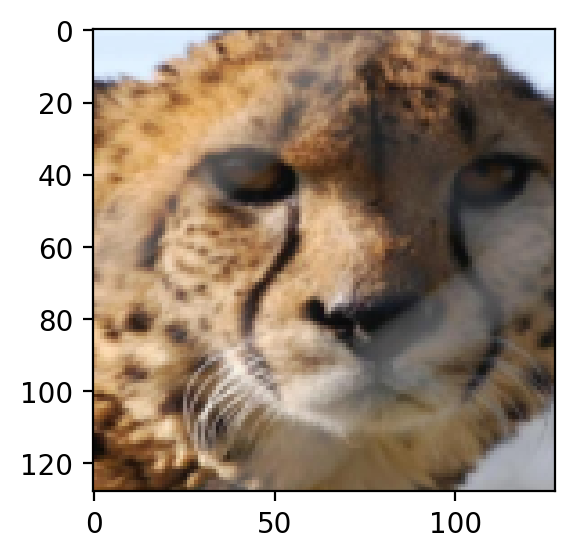

In [ ]:
# Use during normalization
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    print(inp.shape)
    plt.imshow(inp)
imshow(X[0])

### CNN Model with Residual Connections

In [ ]:
class ResDown(nn.Module):
    """
    Residual down sampling block for the encoder
    """

    def __init__(self, channel_in, channel_out, kernel_size=3):
        super(ResDown, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out // 2, kernel_size=kernel_size, stride=2, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(channel_out // 2, eps=1e-4)
        self.conv2 = nn.Conv2d(in_channels=channel_out // 2, out_channels=channel_out, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(channel_out, eps=1e-4)

        self.conv3 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out, kernel_size=kernel_size, stride=2, padding=kernel_size // 2)

        self.act_fnc = nn.ELU()

    def forward(self, x):
        skip = self.conv3(x)
        x = self.act_fnc(self.bn1(self.conv1(x)))
        x = self.conv2(x)
        return self.act_fnc(self.bn2(x + skip))
    


In [ ]:
class CNN(nn.Module):
    def __init__(self, latent_dims):
        super(CNN, self).__init__()

        self.block_out_channels = [64,128,256,512,1024]
        
        self.conv1 = ResDown(channel_in=3,channel_out=self.block_out_channels[0])
        #self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = ResDown(channel_in=self.block_out_channels[0],channel_out=self.block_out_channels[1])
        #self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = ResDown(channel_in=self.block_out_channels[1],channel_out=self.block_out_channels[2])
        #self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = ResDown(channel_in=self.block_out_channels[2],channel_out=self.block_out_channels[3])
        #self.bn4 = nn.BatchNorm2d(128)

        self.conv5 = ResDown(channel_in=self.block_out_channels[3],channel_out=self.block_out_channels[4])
        #self.bn5 = nn.BatchNorm2d(256)

        self.conv = nn.Conv2d(in_channels=self.block_out_channels[4], out_channels=latent_dims, kernel_size=4)
        self.fc1 = nn.Linear(latent_dims,128)
        self.fc2 = nn.Linear(128,3)
        self.flatten = nn.Flatten()

        
        #self.act = nn.ReLU()

    def forward(self, x):
        # x = (b,3,128,128)
        out = self.conv1(x) # (b,64,64,64)
        out = self.conv2(out) # (b,128,32,32)
        out = self.conv3(out) # (b,256,16,16)
        out = self.conv4(out) # (b,512,8,8)
        out = self.conv5(out) # ( b,1024,4,4)
        out = self.conv(out) # (b,1024,1,1)

        out = self.flatten(out) # (b,1024)
        out = self.fc2(self.fc1(out)) # (b,NUM_CLASSES)

        return out

### Training

In [ ]:
import time
import copy
from torch.optim import lr_scheduler

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # keeps track of best_model for every epoch that performs better on val dataset
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Keep track of losses and accuracy in each epoch
    losses = {'train':[],'val':[]}
    acc = {'train':[],'val':[]}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            iter = 0
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                iter+=1
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'train' and iter%100 == 0:
                    print(f'Iteration: {iter} Loss: {running_loss/(iter*BATCH_SIZE):.4f}')
            if phase == 'train':
                scheduler.step()


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            losses[phase].append(epoch_loss)
            acc[phase].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,losses,acc

In [ ]:
model = CNN(latent_dims=1024).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model

CNN(
  (conv1): ResDown(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (act_fnc): ELU(alpha=1.0)
  )
  (conv2): ResDown(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (act_fnc): ELU(alpha=1.0)
  )
  (conv3): ResDown(
    (conv1): Conv2d(128,

In [ ]:
model,loss,acc = train_model(model, criterion, optimizer, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------


Iteration: 100 Loss: 0.9373
Iteration: 200 Loss: 0.7074
Iteration: 300 Loss: 0.6207
Iteration: 400 Loss: 0.5713
train Loss: 1.1021 Acc: 0.5587
val Loss: 0.6586 Acc: 0.7107

Epoch 1/9
----------
Iteration: 100 Loss: 0.4034
Iteration: 200 Loss: 0.3894
Iteration: 300 Loss: 0.3769
Iteration: 400 Loss: 0.3725
train Loss: 0.7336 Acc: 0.6734
val Loss: 0.7075 Acc: 0.6813

Epoch 2/9
----------
Iteration: 100 Loss: 0.3271
Iteration: 200 Loss: 0.3158
Iteration: 300 Loss: 0.3094
Iteration: 400 Loss: 0.3013
train Loss: 0.5983 Acc: 0.7524
val Loss: 0.5090 Acc: 0.7980

Epoch 3/9
----------
Iteration: 100 Loss: 0.2701
Iteration: 200 Loss: 0.2650
Iteration: 300 Loss: 0.2645
Iteration: 400 Loss: 0.2636
train Loss: 0.5276 Acc: 0.7865
val Loss: 0.3560 Acc: 0.8613

Epoch 4/9
----------
Iteration: 100 Loss: 0.2478
Iteration: 200 Loss: 0.2536
Iteration: 300 Loss: 0.2536
Iteration: 400 Loss: 0.2490
train Loss: 0.4957 Acc: 0.8031
val Loss: 0.5473 Acc: 0.7787

Epoch 5/9
----------
Iteration: 100 Loss: 0.2538
It

In [ ]:
model,loss,acc = train_model(model, criterion, optimizer, exp_lr_scheduler,
                       num_epochs=2)

Epoch 0/1
----------
Iteration: 100 Loss: 0.1380
Iteration: 200 Loss: 0.1321
Iteration: 300 Loss: 0.1299
Iteration: 400 Loss: 0.1291
train Loss: 0.2599 Acc: 0.9000
val Loss: 0.1781 Acc: 0.9280

Epoch 1/1
----------
Iteration: 100 Loss: 0.1384
Iteration: 200 Loss: 0.1322
Iteration: 300 Loss: 0.1302
Iteration: 400 Loss: 0.1319
train Loss: 0.2610 Acc: 0.8983
val Loss: 0.1648 Acc: 0.9333

Training complete in 1m 12s
Best val Acc: 0.933333


### Loss vs Epochs

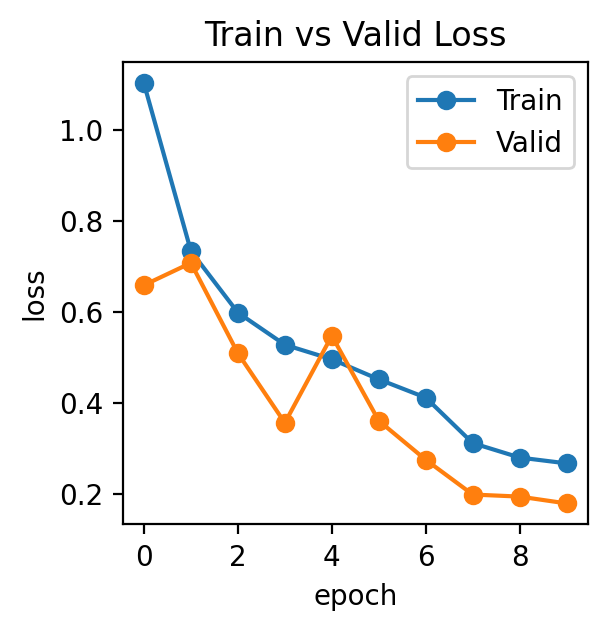

In [ ]:
plt.plot(torch.tensor(loss['train']).numpy(),'-o')
plt.plot(torch.tensor(loss['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
 
plt.show()

### Accuracy vs Epochs

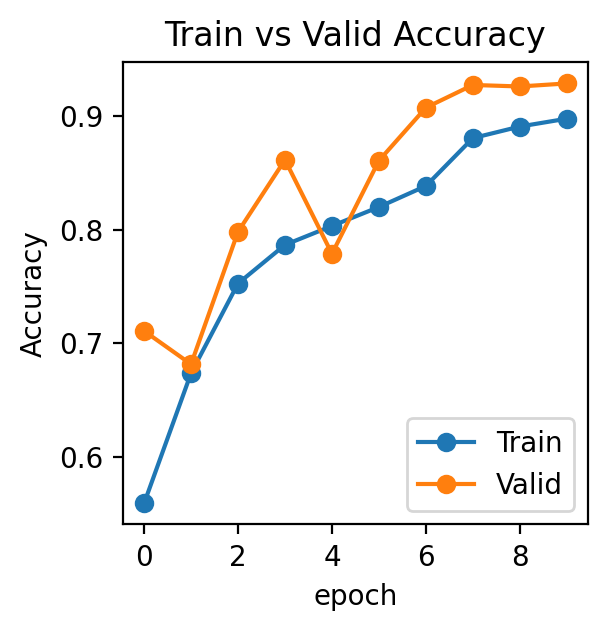

In [ ]:
plt.plot(torch.tensor(acc['train']).numpy(),'-o')
plt.plot(torch.tensor(acc['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
 
plt.show()

### Testing model

In [ ]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['val']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the test images: 93.33333333333333 %


### Visualising model

In [ ]:
def visualize_model(model, num_images=2):
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    return

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


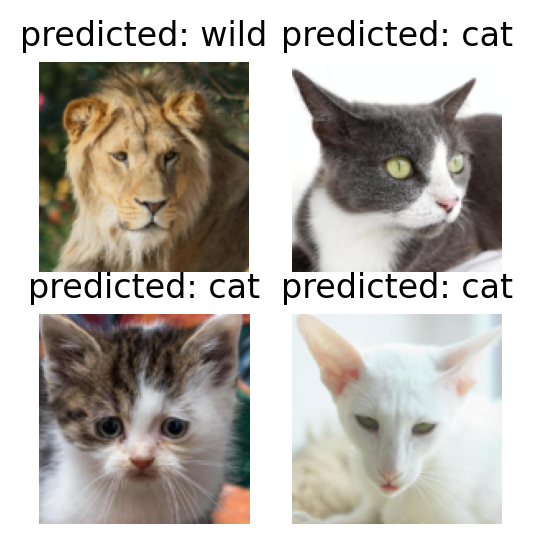

In [ ]:
visualize_model(model,num_images=4)

## MLP classifier on latents

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
NUM_CLASSES = 3
BATCH_SIZE = 128
device


'cuda:0'

In [ ]:
train_X = torch.load('./latent_dataset/latent_16/trainX_tensor.pt')
train_Y = torch.load('./latent_dataset/latent_16/trainY_tensor.pt')
val_X = torch.load('./latent_dataset/latent_16/valX_tensor.pt')
val_Y = torch.load('./latent_dataset/latent_16/valY_tensor.pt')

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_data = TensorDataset(train_X, train_Y)
val_data = TensorDataset(val_X,val_Y)

image_datasets = {'train' : train_data, 'val' : val_data}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}



print("Train dataset size --- ",len(train_data))
print("Val dataset size --- ",len(val_data))



Train dataset size ---  14630
Val dataset size ---  1500


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,512)
        #self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,512)
        self.fc4 = nn.Linear(512,NUM_CLASSES)
        self.act = nn.ReLU()

        self.dropout = nn.Dropout(0.7)

    def forward(self,x):
        # x = (b,16)
        out = self.act(self.fc1(x))
        out = self.dropout(out)
        #out = self.act(self.fc2(out))
        #out = self.dropout(out)
        out = self.act(self.fc3(out))
        out = self.fc4(out) # (b,3)

        return out

In [ ]:
import time
import copy
from torch.optim import lr_scheduler

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # keeps track of best_model for every epoch that performs better on val dataset
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Keep track of losses and accuracy in each epoch
    losses = {'train':[],'val':[]}
    acc = {'train':[],'val':[]}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            iter = 0
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                iter+=1
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                #if phase == 'train' and iter%200 == 0:
                    #print(f'Iteration: {iter} Loss: {running_loss/(iter*BATCH_SIZE):.4f}')
            if phase == 'train':
                scheduler.step()


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            losses[phase].append(epoch_loss)
            acc[phase].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,losses,acc

In [ ]:
model = MLP(input_size=16).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model

In [ ]:
model,loss,acc = train_model(model, criterion, optimizer, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 0.7755 Acc: 0.6567
val Loss: 0.6269 Acc: 0.7393

Epoch 1/14
----------
train Loss: 0.6527 Acc: 0.7282
val Loss: 0.5833 Acc: 0.7587

Epoch 2/14
----------
train Loss: 0.6026 Acc: 0.7508
val Loss: 0.5525 Acc: 0.7753

Epoch 3/14
----------
train Loss: 0.5703 Acc: 0.7658
val Loss: 0.5362 Acc: 0.7867

Epoch 4/14
----------
train Loss: 0.5423 Acc: 0.7794
val Loss: 0.5133 Acc: 0.7960

Epoch 5/14
----------
train Loss: 0.5181 Acc: 0.7884
val Loss: 0.4983 Acc: 0.8047

Epoch 6/14
----------
train Loss: 0.5069 Acc: 0.7962
val Loss: 0.4928 Acc: 0.8080

Epoch 7/14
----------
train Loss: 0.4790 Acc: 0.8047
val Loss: 0.4869 Acc: 0.8133

Epoch 8/14
----------
train Loss: 0.4787 Acc: 0.8057
val Loss: 0.4844 Acc: 0.8133

Epoch 9/14
----------
train Loss: 0.4695 Acc: 0.8126
val Loss: 0.4811 Acc: 0.8120

Epoch 10/14
----------
train Loss: 0.4703 Acc: 0.8066
val Loss: 0.4797 Acc: 0.8133

Epoch 11/14
----------
train Loss: 0.4679 Acc: 0.8144
val Loss: 0.4787 Acc: 0.8153

Ep

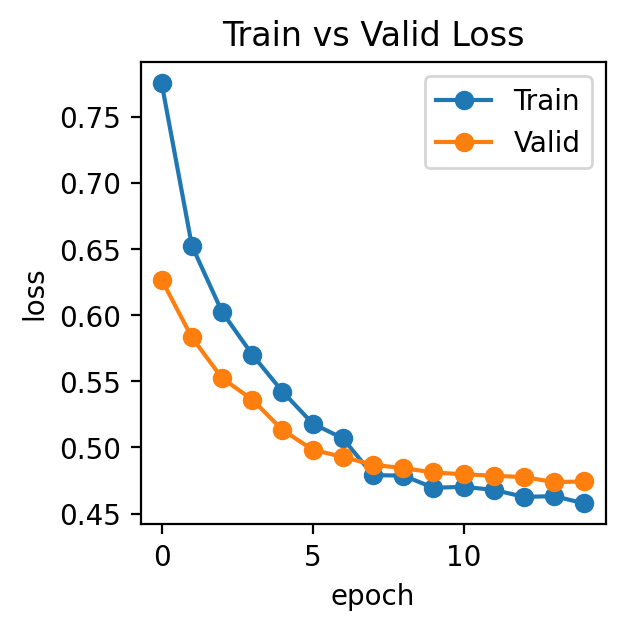

In [ ]:
plt.plot(torch.tensor(loss['train']).numpy(),'-o')
plt.plot(torch.tensor(loss['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
 
plt.show()

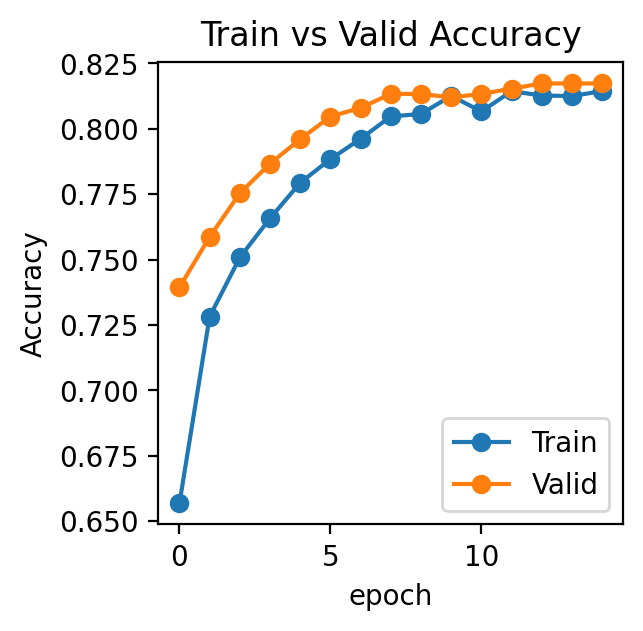

In [ ]:
plt.plot(torch.tensor(acc['train']).numpy(),'-o')
plt.plot(torch.tensor(acc['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
 
plt.show()

In [6]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['val']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the test images: 82.33 %


# Problem 4

## Vanilla Autoencoder with MSE loss

In [ ]:
LATENT_DIMS = 16
BATCH_SIZE = 64
IMAGE_SIZE = 128

In [ ]:

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ]),
}

# Create train,test and validation datasets
train_data = datasets.ImageFolder('../afhq/train/',data_transforms['train'])
val_data = datasets.ImageFolder('../afhq/val/',data_transforms['val'])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
class_names = train_data.classes

print("Train dataset size --- ",len(train_data))
print("Val dataset size --- ",len(val_data))
print("Class_names --- ",class_names)

Train dataset size ---  14630
Val dataset size ---  1500
Class_names ---  ['cat', 'dog', 'wild']


In [ ]:
train_iter = iter(train_loader)
X,Y = next(train_iter)
print(X.shape)
print(Y.shape)

torch.Size([64, 3, 128, 128])
torch.Size([64])


In [ ]:
print(X.max())
print(X.min())

tensor(1.)
tensor(0.)


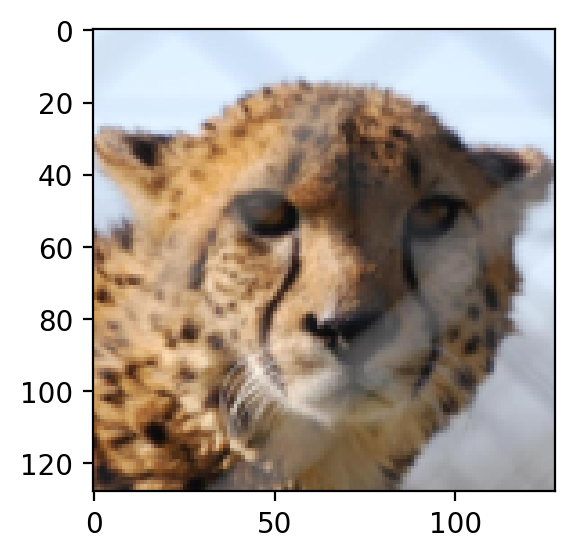

In [ ]:
# When pixel values are in range 0-1
plt.imshow(X[0].permute(1,2,0))

In [ ]:
class ResDown(nn.Module):
    """
    Residual down sampling block for the encoder
    """

    def __init__(self, channel_in, channel_out, stride = 2,kernel_size=3):
        super(ResDown, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out // 2, kernel_size=kernel_size, stride=stride, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(channel_out // 2, eps=1e-4)
        self.conv2 = nn.Conv2d(in_channels=channel_out // 2, out_channels=channel_out, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(channel_out, eps=1e-4)

        self.conv3 = nn.Conv2d(in_channels=channel_in, out_channels=channel_out, kernel_size=kernel_size, stride=stride, padding=kernel_size // 2)

        self.act_fnc = nn.ELU()

    def forward(self, x):
        skip = self.conv3(x)
        x = self.act_fnc(self.bn1(self.conv1(x)))
        x = self.conv2(x)
        return self.act_fnc(self.bn2(x + skip))
    

class ResUp(nn.Module):
    """
    Residual up sampling block for the decoder
    """

    def __init__(self, channel_in, channel_out, kernel_size=3, upsample = True,scale_factor=2):
        super(ResUp, self).__init__()

        self.upsample = upsample
        self.conv1 = nn.Conv2d(channel_in, out_channels=channel_in // 2, kernel_size=kernel_size, stride=1, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm2d(channel_in // 2, eps=1e-4)
        self.conv2 = nn.Conv2d(channel_in // 2, channel_out, kernel_size, 1, kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(channel_out, eps=1e-4)

        self.conv3 = nn.Conv2d(channel_in, channel_out, kernel_size, 1, kernel_size // 2)

        #self.up_nn = nn.Upsample(scale_factor=scale_factor, mode="nearest")
        self.up_nn = nn.ConvTranspose2d(channel_in, channel_in, kernel_size=4, stride = 2, padding=1)

        self.act_fnc = nn.ELU()

    def forward(self, x):
        if self.upsample:
            x = self.up_nn(x)
        skip = self.conv3(x)
        x = self.act_fnc(self.bn1(self.conv1(x)))
        x = self.conv2(x)

        return self.act_fnc(self.bn2(x + skip))

In [ ]:
class Encoder(nn.Module):
    def __init__(self,in_channels = 3,latent_channels = 4):
        super(Encoder, self).__init__()
        self.block_out_channels = [64,128,256,512]
        self.conv_in = torch.nn.Conv2d(
            in_channels,
            self.block_out_channels[0],
            kernel_size=3,
            stride=1,
            padding=1,
        )

        self.conv1 = ResDown(channel_in=self.block_out_channels[0],channel_out=self.block_out_channels[0],stride=2)


        self.conv2 = ResDown(channel_in=self.block_out_channels[0],channel_out=self.block_out_channels[1],stride=2)

        self.conv3 = ResDown(channel_in=self.block_out_channels[1],channel_out=self.block_out_channels[2],stride=2)

        self.conv4 = ResDown(channel_in=self.block_out_channels[2],channel_out=self.block_out_channels[3],stride=2)

        self.mid = ResDown(channel_in=self.block_out_channels[3],channel_out=self.block_out_channels[3],stride=2)

        self.conv_norm_out = nn.GroupNorm(num_channels=self.block_out_channels[-1], num_groups=32, eps=1e-6)
        self.conv_act = nn.SiLU()

        conv_out_channels = latent_channels
        self.conv_out = nn.Conv2d(self.block_out_channels[-1], conv_out_channels, 3, padding=1)

        

    def forward(self, x):
        # x = (b,3,128,128)

        out = x
        out = self.conv_in(out) # (b,64,128,128)
        out = self.conv1(out) # (b,64,64,64)
        out = self.conv2(out) # (b,128,32,32)
        out = self.conv3(out) # (b,256,16,16)
        out = self.conv4(out) # (b,512,8,8)
        out = self.mid(out) # (b,512,4,4)
        out = self.conv_norm_out(out)
        out = self.conv_act(out)
        out = self.conv_out(out) # (b,1,4,4)


        return out

In [ ]:
model = Encoder(latent_channels=2)
def model_memory_size_in_MB(model):
    return sum(p.numel() for p in model.parameters()) * 4 / (1024 ** 2)

print(f"Model size (in MB): {model_memory_size_in_MB(model)}")


Model size (in MB): 33.158905029296875


In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_channels = 4,out_channels = 3):
        super(Decoder, self).__init__()
        self.post_quant_conv = nn.Conv2d(latent_channels, latent_channels, 1)

        self.block_out_channels = [64,128,256,512]
        self.conv_in = nn.Conv2d(
            latent_channels,
            self.block_out_channels[-1],
            kernel_size=3,
            stride=1,
            padding=1,
        )
        

        #self.mid = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-1],upsample=False)

        self.deconv1 = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-1],upsample=True)

        self.deconv2 = ResUp(channel_in=self.block_out_channels[-1],channel_out=self.block_out_channels[-2],upsample=True)

        self.deconv3 = ResUp(channel_in=self.block_out_channels[-2],channel_out=self.block_out_channels[-3],upsample=True)

        self.deconv4 = ResUp(channel_in=self.block_out_channels[-3],channel_out=self.block_out_channels[-4],upsample=True)

        self.deconv5 = ResUp(channel_in=self.block_out_channels[-4],channel_out=self.block_out_channels[-4],upsample=True)


        

        self.conv_norm_out = nn.GroupNorm(num_channels=self.block_out_channels[0], num_groups=8, eps=1e-6)
        self.conv_act = nn.SiLU()
        self.conv_out = nn.Conv2d(self.block_out_channels[0], out_channels, 3, padding=1)


    def forward(self, z):
        # z = (b,1,4,4)
        out = self.conv_in(z) # (b,512,4,4)


        out = self.deconv1(out) # (b,512,8,8)
        out = self.deconv2(out) # (b,256,16,16)
        out = self.deconv3(out) # (b,128,32,32)
        out = self.deconv4(out) # (b,64,64,64)
        out = self.deconv5(out) # (b,64,128,128)
        
        out = self.conv_norm_out(out)
        out = self.conv_act(out)
        out = self.conv_out(out) # (b,3,128,128)
        
        return out



In [ ]:
decoder = Decoder(latent_channels=2)
print(f"Model size (in MB): {model_memory_size_in_MB(decoder)}")

Model size (in MB): 70.37076187133789


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, latent_channels = 4):
        super(Autoencoder, self).__init__()
        self.latent_channels = latent_channels
        self.encoder = Encoder(latent_channels=latent_channels)
        self.decoder = Decoder(latent_channels=latent_channels)

        self.N = torch.distributions.Normal(0, 1)
        # self.N.loc = self.N.loc.cuda(0) # hack to get sampling on the GPU
        # self.N.scale = self.N.scale.cuda(0)

        #self.kl = 0.0
        #self.recon_loss = 0.0
    
    def reparametrize(self,mu,log_var):
        sigma = torch.exp(0.5*log_var)
        z = mu + sigma*(self.N.sample(mu.shape).to(sigma.device))
        return z
    
    def forward(self, x):
        # Bernoulli MLP
        latent = self.encoder(x)

        # z_sigma = torch.exp(0.5*z_log_var)
        # z = z_mu + z_sigma*self.N.sample(z_mu.shape)
        # z = self.reparametrize(z_mu,z_log_var)
        # self.KL = 0.5 * torch.sum(z_log_var.exp() + z_mu.pow(2) - z_log_var - 1.0,dim=[1, 2, 3]) / BATCH_SIZE
        #print(self.kl)

        x_hat = self.decoder(latent)
        self.recon_loss = F.mse_loss(x_hat, x, reduction='sum') / BATCH_SIZE
        #self.recon_loss = -F.binary_cross_entropy(x_hat, x, reduction='sum') / BATCH_SIZE

        return x_hat,self.recon_loss

In [ ]:
from tensorboardX import SummaryWriter
writer = SummaryWriter('./runs/autoencoder_latent_16')

In [ ]:
autoencoder = Autoencoder(latent_channels=1).to(device) # GPU
# autoencoder.load_state_dict(torch.load('./trained_models/latent_32_checkpoint_30.pth'))
opt = torch.optim.Adam(autoencoder.parameters(), lr= 1e-4)

rec_loss = []


In [ ]:
autoencoder = torch.nn.DataParallel(autoencoder,device_ids = [1,2,3,4])
#autoencoder(X.to(device))[0].shape

In [ ]:
epochs = 30

for epoch in range(epochs):
    iter = 0
    total_loss = 0.0
    total_rec_loss = 0.0
    total_KL_loss = 0.0
    for x, y in train_loader:
        iter+=1
        x = x*2.0 - 1.0
        x = x.to(device) # GPU
        opt.zero_grad()
        x_hat,recon_loss = autoencoder(x)
        recon_loss = torch.sum(recon_loss)

        # rec_loss.append(-autoencoder.recon_loss)
        # KL_loss.append(autoencoder.KL)
        loss = recon_loss
        total_loss +=loss
        total_rec_loss +=recon_loss
        loss.backward()
        
        opt.step()
        if iter%10 == 0:
            #print("Epoch == ",epoch,"Iter == ",iter,"  Loss == ",total_loss.item()/(iter))
            writer.add_scalar('Rec_Loss/train', total_rec_loss.item()/iter, epoch*len(train_loader)+iter)
        if iter%50 == 0:
            print("Epoch == ",epoch,"Iter == ",iter,"  Loss == ",total_loss.item()/(iter))
    
    if epoch>0 and epoch%5 == 0:
        torch.save(autoencoder.module.state_dict(), os.path.join('./trained_models/autoencoder/latent_16_checkpoint_{}.pth'.format(epoch)))
            
    rec_loss.append(total_rec_loss.item()/len(train_loader))
    print("\n\nEpoch == ",epoch,"  Loss == ",total_loss.item()/len(train_loader))

/data4/home/manikantab/Diffusion_models/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch ==  0 Iter ==  50   Loss ==  7960.426875


Epoch ==  0   Loss ==  7548.370150862069
Epoch ==  1 Iter ==  50   Loss ==  5236.563125


Epoch ==  1   Loss ==  5147.595905172414
Epoch ==  2 Iter ==  50   Loss ==  4972.3921875


Epoch ==  2   Loss ==  4884.712284482759
Epoch ==  3 Iter ==  50   Loss ==  4819.261875


Epoch ==  3   Loss ==  4741.182112068966
Epoch ==  4 Iter ==  50   Loss ==  4704.3309375


Epoch ==  4   Loss ==  4631.549568965517
Epoch ==  5 Iter ==  50   Loss ==  4593.980625


Epoch ==  5   Loss ==  4529.834051724138
Epoch ==  6 Iter ==  50   Loss ==  4530.23


Epoch ==  6   Loss ==  4459.176724137931
Epoch ==  7 Iter ==  50   Loss ==  4501.2121875


Epoch ==  7   Loss ==  4423.933459051724
Epoch ==  8 Iter ==  50   Loss ==  4443.6271875


Epoch ==  8   Loss ==  4378.992995689655
Epoch ==  9 Iter ==  50   Loss ==  4404.7296875


Epoch ==  9   Loss ==  4347.121228448276
Epoch ==  10 Iter ==  50   Loss ==  4406.0703125


Epoch ==  10   Loss ==  4345.231950431034
Epoch 

In [ ]:
model = Autoencoder(latent_channels=1).to('cuda:1')
model.load_state_dict(torch.load('./trained_models/autoencoder/latent_16_checkpoint_25.pth'))
model.eval()

Autoencoder(
  (encoder): VariationalEncoder(
    (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1): ResDown(
      (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act_fnc): ELU(alpha=1.0)
    )
    (conv2): ResDown(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
      (co

### Generating latent for classification

In [ ]:
train_X = torch.zeros(len(train_data),LATENT_DIMS)
train_Y = torch.zeros(len(train_data))

val_X = torch.zeros(len(val_data),LATENT_DIMS)
val_Y = torch.zeros(len(val_data))

for ind,(x, y) in enumerate(train_loader):
    x = x*2.0 - 1.0
    x = x.to('cuda:1') 
    latent = model.encoder(x)
    latent = latent.view(latent.size(0),-1)
    train_X[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE,:LATENT_DIMS] = latent.detach()
    #train_X[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE,LATENT_DIMS:] = z_log_var.detach()

    train_Y[ind*BATCH_SIZE:(ind+1)*BATCH_SIZE] = y
    if ind%100==0:
        print(ind)


0
100
200


In [ ]:

for ind,(x, y) in enumerate(val_loader):
    x = x*2.0 - 1.0
    x = x.to('cuda:1') 
    latent = model.encoder(x)
    latent = latent.view(latent.size(0),-1)
    #print(z_mu.shape,ind*BATCH_SIZE,min(len(val_data),(ind+1)*BATCH_SIZE))

    val_X[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE),:LATENT_DIMS] = latent.detach()
    #val_X[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE),LATENT_DIMS:] = z_log_var.detach()

    val_Y[ind*BATCH_SIZE:min(len(val_data),(ind+1)*BATCH_SIZE)] = y
    if ind%100==0:
        print(ind)

0


In [ ]:
train_Y = train_Y.to(torch.int64)
val_Y = val_Y.to(torch.int64)
NUM_CLASSES = 3

In [ ]:
torch.save(train_X, './latent_dataset/autoencoder//trainX_tensor.pt')
torch.save(train_Y, './latent_dataset/autoencoder/trainY_tensor.pt')
torch.save(val_X, './latent_dataset/autoencoder/valX_tensor.pt')
torch.save(val_Y, './latent_dataset/autoencoder/valY_tensor.pt')


## GMM on latents learned by Autoencoder

In [ ]:
M = 3 # mixture components
BATCH_SIZE = 32
NUM_FEATURES = 16

In [ ]:
X = torch.load('./latent_dataset/autoencoder/trainX_tensor.pt')
Y = torch.load('./latent_dataset/autoencoder/trainY_tensor.pt')
print(X.shape)
print(Y.shape)

torch.Size([14630, 16])
torch.Size([14630])


In [ ]:
class GMM(nn.Module):
    def __init__(self, img_size, num_mixtures = 3):
        super(GMM, self).__init__()
        self.num_mixtures = num_mixtures
        self.img_size = img_size
        self.alpha = (1/num_mixtures)*torch.ones(num_mixtures).to(device) # (num_mixtures)
        self.mue = torch.zeros((num_mixtures,img_size)).to(device) # (num_mixtures, img_size)
        unit_matrix = torch.eye(img_size).to(device)

        # Repeat it 12 times to get the desired tensor
        self.cov = unit_matrix.unsqueeze(0).repeat(num_mixtures, 1, 1)
        self.likelihood = []


    def forward(self,X):
        log_likelihood = 0
        # X = (14630, img_size)
        N = X.shape[0]
        eps = 1e-4

        A = torch.zeros((N,self.num_mixtures)).to(device)
        dists = []
        for k in range(self.num_mixtures):
            dists.append(MultivariateNormal(self.mue[k], covariance_matrix=self.cov[k]))
            
        for i in range(N):
            pdfs = []
            for k in range(self.num_mixtures):
                pdf = self.alpha[k].item() * torch.exp(dists[k].log_prob(X[i])).to(device) # pdf = alpha_k * P_theta(x_i)
                pdfs.append(pdf)
            den = sum(pdfs)
            log_likelihood += torch.log(den)
            for k in range(self.num_mixtures):
                num = pdfs[k]
                A[i,k] = num/den    # updating responsibilities

        self.alpha = torch.sum(A,dim = 0).to(device)/N # updating weights for each mixture

        # Updating cov matrix of mixtures
        for k in range(self.num_mixtures):
            temp = torch.zeros_like(self.cov[k]).to(device)
            for i in range(N):
                temp+=A[i,k] * (X[i]-self.mue[k]).unsqueeze(dim = 1) @ (X[i]-self.mue[k]).unsqueeze(dim = 1).T
            temp/=torch.sum(A[:,k]).to(device)
            self.cov[k] = temp
            
        # Updating mean of mixtures
        for k in range(self.num_mixtures):
            self.mue[k] = torch.sum(A[:,k].unsqueeze(dim = 1) * X, dim = 0) / torch.sum(A[:,k])
        
        return log_likelihood
        
    def prob(self,X):
        # X.shape = (N,16)

        N = X.shape[0]
        log_likelihood = 0.0
        dists = []
        for k in range(self.num_mixtures):
            dists.append(MultivariateNormal(self.mue[k], covariance_matrix=self.cov[k]))
        for i in range(N):
            pdfs = []
            for k in range(self.num_mixtures):
                pdf = self.alpha[k].item() * torch.exp(dists[k].log_prob(X[i])).to(device) # pdf = alpha_k * P_theta(x_i)
                pdfs.append(pdf)
            den = sum(pdfs)
            log_likelihood += torch.log(den)
        return log_likelihood
        
    def sample(self):
        k = torch.multinomial(self.alpha.squeeze(), 1).item()
        distribution = MultivariateNormal(self.mue[k], self.cov[k])

        sampled_point = distribution.sample()
        return sampled_point


In [ ]:
model = GMM(num_mixtures=3, img_size=16)
model = model.to(device)

In [ ]:
epochs = 10
for epoch in range(epochs):
    log_liklihood = model.forward(X.to(device))
    print("Epoch == ",epoch,",     Log_Likelihood  == ",log_liklihood)

Epoch ==  0 ,     Log_Likelihood  ==  tensor(-368981.4375, device='cuda:0')
Epoch ==  1 ,     Log_Likelihood  ==  tensor(-331267.5312, device='cuda:0')
Epoch ==  2 ,     Log_Likelihood  ==  tensor(-328596.5625, device='cuda:0')
Epoch ==  3 ,     Log_Likelihood  ==  tensor(-328596.5625, device='cuda:0')
Epoch ==  4 ,     Log_Likelihood  ==  tensor(-328596.6250, device='cuda:0')
Epoch ==  5 ,     Log_Likelihood  ==  tensor(-328596.5625, device='cuda:0')
Epoch ==  6 ,     Log_Likelihood  ==  tensor(-328596.6250, device='cuda:0')


KeyboardInterrupt: 

In [ ]:
X_latent = []
for i in range(100):
    X_latent.append(model.sample())
X_latent = torch.stack(X_latent,dim = 0)
X_latent.shape

torch.Size([100, 16])

In [ ]:
torch.save(X_latent, './latent_dataset/autoencoder/latent_16.pt')

## Generating images from decoder by passing latents sampled from GMM

In [ ]:
model.eval()
gen_images = []
latent = torch.load('./latent_dataset/autoencoder/latent_16.pt')
grid_size = 10*10
each_batch = 2
latent_shape = (each_batch,1,4,4)
for i in range(grid_size//each_batch):
    x_hat = model.decoder(latent[i*each_batch:(i+1)*each_batch].view(each_batch,1,4,4).to('cuda:1'))
    x_hat = (x_hat / 2 + 0.5).clamp(0, 1) 
    gen_images.append(x_hat.detach().cpu())

    

In [ ]:
# # Convert lists of tensor batches into single tensors
import torchvision
gen_images = torch.cat(gen_images, dim=0)[:100]  # Taking first 100 images

# Create 10x10 grids
gen_grid = torchvision.utils.make_grid(gen_images, nrow=10, padding=2, normalize=True)

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Generated Images")
plt.imshow(gen_grid.permute(1, 2, 0))
plt.axis('off')
plt.savefig('./Generated/autoencoder/latent_from_GMM.png', bbox_inches='tight')
plt.close()

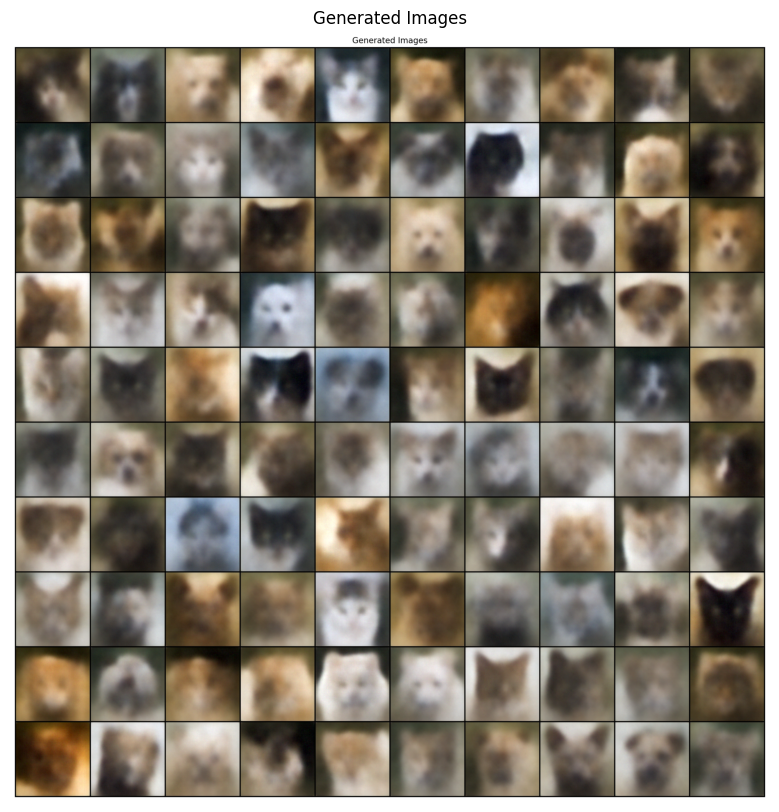

In [4]:
# Read the image
image_path = './Generated/autoencoder/latent_from_GMM.png'
image = Image.open(image_path)

# Plot the image
plt.figure(figsize=(10,10))
plt.title("Generated Images")
plt.imshow(image)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


## Classifier on latents

In [ ]:
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
NUM_CLASSES = 3
BATCH_SIZE = 128
device


'cuda:1'

In [ ]:
train_X = torch.load('./latent_dataset/autoencoder/trainX_tensor.pt')
train_Y = torch.load('./latent_dataset/autoencoder/trainY_tensor.pt')
val_X = torch.load('./latent_dataset/autoencoder/valX_tensor.pt')
val_Y = torch.load('./latent_dataset/autoencoder/valY_tensor.pt')

In [ ]:
train_X.shape

torch.Size([14630, 16])

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_data = TensorDataset(train_X, train_Y)
val_data = TensorDataset(val_X,val_Y)

image_datasets = {'train' : train_data, 'val' : val_data}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}



print("Train dataset size --- ",len(train_data))
print("Val dataset size --- ",len(val_data))



Train dataset size ---  14630
Val dataset size ---  1500


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,1024)
        #self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(1024,1024)
        self.fc4 = nn.Linear(1024,NUM_CLASSES)
        self.act = nn.ReLU()

        self.dropout = nn.Dropout(0.7)

    def forward(self,x):
        # x = (b,16)
        out = self.act(self.fc1(x))
        out = self.dropout(out)
        #out = self.act(self.fc2(out))
        #out = self.dropout(out)
        out = self.act(self.fc3(out))
        out = self.fc4(out) # (b,3)

        return out

In [ ]:
import time
import copy
from torch.optim import lr_scheduler

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # keeps track of best_model for every epoch that performs better on val dataset
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Keep track of losses and accuracy in each epoch
    losses = {'train':[],'val':[]}
    acc = {'train':[],'val':[]}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            iter = 0
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                iter+=1
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                #if phase == 'train' and iter%200 == 0:
                    #print(f'Iteration: {iter} Loss: {running_loss/(iter*BATCH_SIZE):.4f}')
            if phase == 'train':
                scheduler.step()


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            losses[phase].append(epoch_loss)
            acc[phase].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,losses,acc

In [ ]:
model = MLP(input_size=16).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model

MLP(
  (fc1): Linear(in_features=16, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=3, bias=True)
  (act): ReLU()
  (dropout): Dropout(p=0.7, inplace=False)
)

In [ ]:
model,loss,acc = train_model(model, criterion, optimizer, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------
train Loss: 0.7627 Acc: 0.6651
val Loss: 0.6626 Acc: 0.7233

Epoch 1/19
----------
train Loss: 0.6821 Acc: 0.7109
val Loss: 0.6456 Acc: 0.7400

Epoch 2/19
----------
train Loss: 0.6454 Acc: 0.7291
val Loss: 0.6123 Acc: 0.7513

Epoch 3/19
----------
train Loss: 0.6226 Acc: 0.7357
val Loss: 0.6052 Acc: 0.7500

Epoch 4/19
----------
train Loss: 0.6015 Acc: 0.7467
val Loss: 0.5934 Acc: 0.7593

Epoch 5/19
----------
train Loss: 0.5963 Acc: 0.7583
val Loss: 0.5820 Acc: 0.7647

Epoch 6/19
----------
train Loss: 0.5864 Acc: 0.7575
val Loss: 0.5801 Acc: 0.7587

Epoch 7/19
----------
train Loss: 0.5646 Acc: 0.7684
val Loss: 0.5734 Acc: 0.7687

Epoch 8/19
----------
train Loss: 0.5581 Acc: 0.7695
val Loss: 0.5708 Acc: 0.7713

Epoch 9/19
----------
train Loss: 0.5589 Acc: 0.7668
val Loss: 0.5686 Acc: 0.7793

Epoch 10/19
----------
train Loss: 0.5519 Acc: 0.7698
val Loss: 0.5676 Acc: 0.7747

Epoch 11/19
----------
train Loss: 0.5492 Acc: 0.7726
val Loss: 0.5649 Acc: 0.7793

Ep

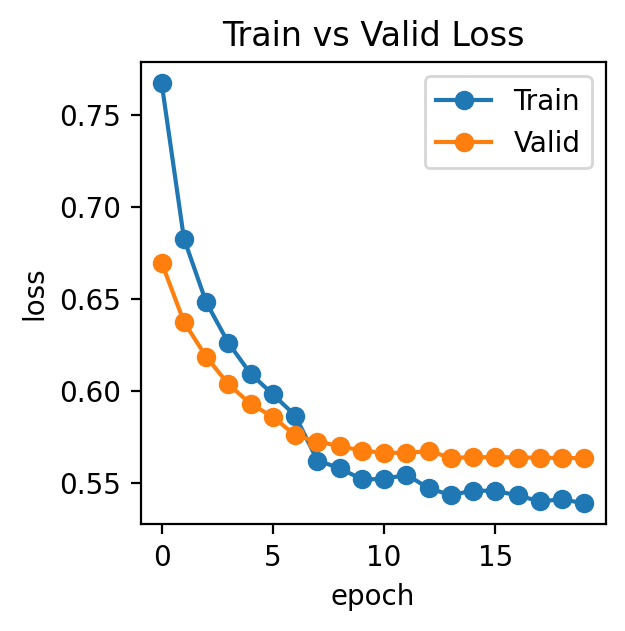

In [ ]:
plt.plot(torch.tensor(loss['train']).numpy(),'-o')
plt.plot(torch.tensor(loss['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')
 
plt.show()

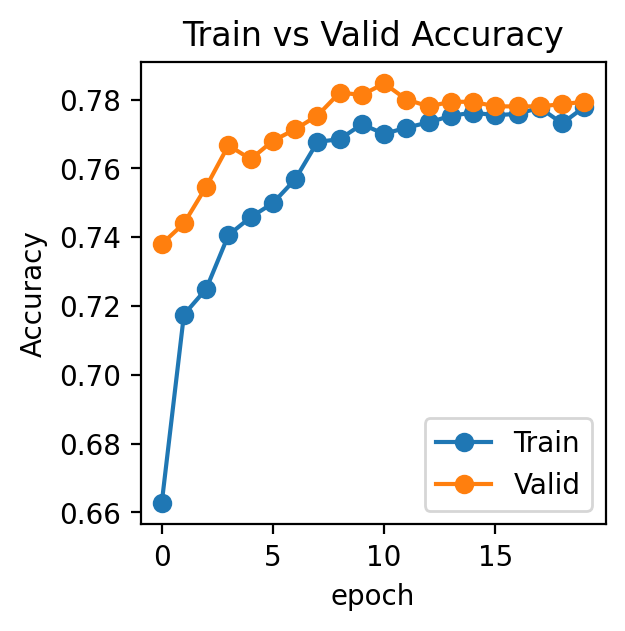

In [ ]:
plt.plot(torch.tensor(acc['train']).numpy(),'-o')
plt.plot(torch.tensor(acc['val']).numpy(),'-o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
 
plt.show()

In [ ]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['val']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the test images: 78.46666666666667 %
